<center><h1>Chapter 8</h1></center>

This week we will work on what is called an *Artifical Neural Net*, also known as a *multi-layer perceptron* (MLP) or a *deep-learning model*.

Although we have been working with machine learning models up to now, i.e., KNN and Naive Bayes, this is the first place where we will actually see "learning" taking place. It is pretty cool.

#1. Neural networks were inspired by nature

In their 1943 paper, McCulloch and Pitts proposed a theoretical model that described the nervous system as a “net of neurons.” As a whole, the network is capable of extremely complex computations, but each individual neuron is inherently very simple. Instead of being connected to every single neuron in the entire network, each neuron is only connected to its neighbor neurons via “synapses.” By studying mappings of the human brain (see image below), we can see that neurons are often organized in consecutive “layers.”

<img src='https://www.dropbox.com/s/93xj4iyvcav7b05/Screenshot%202020-04-28%2010.02.39.png?raw=1'>


The gist of all of this is that each neuron has an input and an output and neurons are organized in layers. Let’s see how artificial neural networks in machine learning draw inspiration from this architecture we observe in nature.

#2. First neural nets were simple

<img src='https://miro.medium.com/max/1032/1*WswH2fPx0bf_JFRMm8V-HA.gif'>

They had an input layer and an output layer. You can think of the input layer as accepting a vector. Each item in the vector gets placed on one of the nodes. These node/items are shown as X0, X1, X2, X3 in the figure. If we were working with our tweet data, we would have 29 input nodes, one for each value in the 29-element vector.

There are a corresponding vector of weights for the input nodes. These are shown as W0, W1, W2, and W3 in above figure.

There is one node in the ouput layer. It produces a result that sums the inputs times the weights. Yp shows this. BTW: in linear algebra terms, we are taking the dot product of the X vector and the weight vector.

That's it! But the story does not end there. What someone noticed is that the equation for calculating Yp looks exactly like a linear regression problem. In a linear regression problem we are trying to find weight values that give us a linear transformation of the inputs, Xi, to the output Yp. In the case of a 2D problem, this will give us a line that will separate our data with minimal error (we hope optimistically).

<img src='http://www.practicalai.io/wp-content/uploads/2017/06/admission-data-linear.png'  height=200>

We can generalize this to 3D, 4D, etc., with a little fancier math.
In the end, critics said that this neural net is just a hyped up version for linear regression which has been around forever. Unfortunately, they were right.

To answer, some said we need to add more layers. Check this out.

<img src='https://miro.medium.com/max/1028/1*cMlfLORZWxtK7fZBLx4DsQ.gif'>

But have we really changed anything? We have made our linear equation more complex. But it remains a linear transformation nevertheless.

<img src='https://miro.medium.com/max/1016/1*g2HHjCkxeemizfLQC-BaAg.gif'>

You may have noticed I slipped in a function A above. For the early simple nets, this was simply the identity function `A(x) = x`. More on this in a bit.

#2 What's wrong with linear regression?

Nothing! As long as the problem you are trying to solve has linear properties. In the simple case, maybe our data can be divided by a line. For instance, let's say we plotted Age versus Sex in the Titanic data and got this.

<img src='https://sebastianraschka.com/images/faq/logistic_regression_linear/4.png'>

That would be nice! We can find the equation for a single line that separates 0s (perished) from 1s (survived). Prediction becomes easy. Plot a new point and determine which side of the line it falls on.


##Support Vector Machines

But let's say there is no line that cleanly separates our data. What if looks closer to that on left below. Can't find a linear equation for that squiggly line.

<img src='https://www.dropbox.com/s/rk83o8qqgr7vsq2/Screenshot%202020-04-28%2011.00.53.png?raw=1'>

Well, there is something that can help (sometimes). The general algorithm is called Support Vector Machines (SVM). I find it almost magical. What it attempts to do is map your problem in 2D space to 3D space. So the opposite of feature reduction. It is feature expansion!

 Once in 3D space, you may be able to find not a line but a plane that does cleanly separate the new 3D points. What's the catch? First you have to find the 2D-to-3D mapping function, called a kernel function. Then you have to find the plane. When it works, it is the coolest.

##Artificial Neural Nets (ANNs) are an alternative

We could spend several weeks on SVMs alone. But I want to concentrate on ANNs instead. Why? Because they are more versatile when it comes to working with text.

The big jump in Neural Nets came from observing biological neurons a little more closely. We can see summation of inputs happening in the cell body. We can see values being transferred to the outputs. But we can also see what I will call an activiation function. So there is not a straight pass through of weighted sums from input to output. A certain threshold has to be reached before firing takes place.

<img src='https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png'>

It might be best to turn to a more realistic view of an ANN at this point to look at nodes and activation functions.

#Picture of a simple ANN

Check out the picture below. 

<img src='https://www.dropbox.com/s/zdv3sjzssiewwf3/Screenshot%202020-02-18%2010.30.12.png?raw=1'>

The nodes (drawn as circles) on the left make up the *input layer*. This layer is just a pass-through of a vector like we have been using with Titanic and tweet matrices. It represents one row being handed to the ANN. So that 0.44 would be first number in our vector, .33 the second, and so forth. So it is our vector tilted on its side.

The ANNs we work with will be  *dense* networks. This means that each node in the input layer supplies a value to each node in the Hidden layer. You can see this as the mess of lines from Input layer to Hidden layer. The nodes in the Hidden layer are, in turn, connected to all the nodes in the Output layer. Only one node in our case. You can see that the output node is producing either a 0 or 1, e.g., perished or survived, hate or no hate, etc.

You can see 5 nodes in the  *hidden layer*. This is a bit of a misnomer given there is nothing hidden about it. But that is what it is called.

What is not shown in this picture are the weights. There is a weight on every line.







##A node

What are in the circles (i.e., nodes) on the diagram above? Each node has k input lines. The outliers are the input nodes which have just 1 input line and no weights. They just pass through the value from the sample to the first hidden layer. Check out the diagram below for what the nodes look like in hidden layers and the output layer.

<img src='https://www.researchgate.net/profile/Karem_Chokmani/publication/255629329/figure/fig2/AS:339705213276163@1458003442306/The-basic-element-of-a-neural-network-node-computation.png'>

It is a bit confusing given the diagram labels the node's input as O for output. This is meant to show the input is coming from output on layer on left. The values of the outputs are floats. Each input line has its own weight W (another float). The operation of the first part of the node is simple. If you view the outputs as in one vector and the weights in a separate vector, take the dot product of the 2 vectors. You can see that in the function labeled I-sub-j, where j is the node number. BTW: GPUs are realllly good at doing dot products quickly.

The more interesting part is what is called the Activation Function *f*. I showed this as the function A in an earlier diagram. It takes the result of the dot-product (typically called Z) and produces the actual output of the node. If you choose a linear activation function, e.g., `f(x) = cx`, you will end up with a network that computes a linear function no matter how many layers and nodes you have.

  Check this problem out, the simple XOR function. The XOR function is True if one of its inputs is true, but not both. So True XOR True is False. You can see I can try various ways to divide the space up with a line (i.e., linearly) but nothing works. It has no linear solution.

<img src='https://www.dropbox.com/s/oeud4lstd84l88d/Screenshot%202020-02-21%2013.27.25.png?raw=1' height=300>

The problems we typically want to study are like this; they do not have a linear solution. Someone asked what if we used a non-linear activation function? Would that help? Uh, big yes.

Here are a couple non-linear functions that have become popular.

##RELU

 The rectified linear activation function is a piecewise linear function that will output the input directly if is positive, otherwise, it will output zero. Its implementation is trivial: `max(0,x)`.

<img src='https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png' height=200>

To me it is the closest to mimic a biological neuron that waits for some threshold to be reached before activating.

##Sigmoid

Produces a sigmoid or "S" curve with following function (the logistic version produces a value between 0 and 1):

<img src='https://www.dropbox.com/s/58hr9e4iusnmapc/Screenshot%202020-02-18%2014.02.06.png?raw=1'>

<img src='https://www.dropbox.com/s/wdqdl22m2l7jruo/Screenshot%202020-02-18%2014.02.21.png?raw=1'>

##Others

See https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e for a nice table of activation functions you have to choose from. We will only use RELU and SIGMOID for our examples.

##How is an ANN actually implemented?

I hinted at the implementation already. What is a node? It really is its vector of weights on the outputs from the preceding layer. So if we store all our node weights in a matrix (one matrix per layer), and we have a vector of outputs (from preceding layer), then we are just doing a dot-product of the output vector against the weight matrix. This will produce an intermediate value (called Z). Now we just pass Z to the activation function to get the node  output.

#3. Go through XOR example

I'd like you to start by building your own neural network from scratch. I know. Sounds daunting. I'll try to break it into bite size pieces.

Let's bring in puddles at this point.


In [0]:
#flush the old directory
!rm -r  'uo_puddles'

In [0]:
my_github_name = 'uo-puddles'  #replace with your account name

In [0]:
#clone_url = f'https://github.com/{my_github_name}/w20_ds_library.git'
clone_url = f'https://github.com/{my_github_name}/uo_puddles.git'

In [0]:
#get the latest.
!git clone $clone_url 


Cloning into 'uo_puddles'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (234/234), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 234 (delta 139), reused 64 (delta 33), pack-reused 0
Receiving objects: 100% (234/234), 59.83 KiB | 252.00 KiB/s, done.
Resolving deltas: 100% (139/139), done.


In [0]:
import uo_puddles.uo_puddles as up

I'll build a couple of functions for you.
First, the dot-product. Reminder it is mutiplying each item in 2 vectors and then summing the whole thing. 

In [0]:
#compute dot product of 2 vectors

def dot(vector1:list, vector2:list) -> float:
  assert isinstance(vector1, list), f'vector1 should be a list but is instead a {type(vector1)}'
  assert isinstance(vector2, list), f'vector2 should be a list but is instead a {type(vector2)}'
  assert len(vector1) == len(vector2), f'both vectors should be the same length'

  result = 0
  for i in range(len(vector1)):
    term = vector1[i]*vector2[i]
    result += term
  return result

Test it out.

In [0]:
inp = [.002, -.09, .6]  #values coming from previous layer
wts = [.5, .4, -.2]  #weights on those values


Next is the function call.

In [0]:
z = dot(wts, inp)  #-0.155
z

-0.155

Here is a look at it in relation to our diagram.

<img src='https://www.dropbox.com/s/en3wtc2p8nea5ig/Screenshot%202020-05-13%2014.35.58.png?raw=1' height=400>

We now have I-sub-j (or Z). We need to take the last step to get the node output. We need to call *f(Z)*. What is *f*? It is our activation function. We get to choose it. I'll define a couple and test them out.

In [0]:
import math
def sigmoid(t:float) -> float:
  s = 1 / (1 + math.exp(-t))  #e to the -t power
  return s

In [0]:
sigmoid(-0.155)  #0.46132739479349205

0.46132739479349205

Here is new diagram with the node output (0.46) using sigmoid.

<img src='https://www.dropbox.com/s/exe1xq59vpnxfrl/Screenshot%202020-05-13%2014.46.43.png?raw=1' height=400>

And RELU while we are at it.

In [0]:
def relu(t:float) -> float:
  result = max(t, 0.0)
  return result

In [0]:
relu(-0.155)  #0.0

0.0

Same thing but now using relu.

<img src='https://www.dropbox.com/s/wv16f1ym79gqmzw/Screenshot%202020-05-13%2014.49.58.png?raw=1' height=300>

I can put it together as a new function that produces the output of a node, assuming sigmoid is choice for activation function.

In [0]:
def neuron_output(weights:list, inputs:list) -> float:
  assert isinstance(weights, list), f'weights should be a list but is instead a {type(weights)}'
  assert isinstance(inputs, list), f'inputs should be a list but is instead a {type(inputs)}'
  assert len(weights) == len(inputs), f'weights and inputs should be the same length'

  z = dot(weights, inputs)
  s = sigmoid(z)  #using sigmoid as activation function
  return s



In [0]:
neuron_output(wts, inp)  #0.46132739479349205

0.46132739479349205

#4. A feedforward function

I think we have the pieces now to define a feedforward function. It will take as argument the set of weights in a network and input values. It will output the final result/prediction.

We will get to the Titanic in a second, but first let's start with  a network that attempts to predict the value of the XOR operator. So it takes two binary numbers in and outputs a  value in range 0 to 1. We take the round of the result to get a binary number as prediction.

Here is a picture of the network.

<img src='https://codingvision.net/imgs/posts/c-backpropagation-tutorial-xor/1.png'>

<img src='https://www.dropbox.com/s/fvko9fo71pp1cpr/Screenshot%202020-02-21%2009.14.37.png?raw=1'>

##Input layer is implied

Even though I show 3 layers in the network, I really only need to deal with 2 layers, the hidden and the output. The input layer just pumps data to the first hidden layer. So it is implied. The best way to view this is to think of the weights belonging to the layer on the right. Given the input layer has no weights on its left, we can leave it out. In essence, it is represented as the `input_vector` below.

##Here are weights I will use for the network

I am going to use a random distribution of weights between -1 and 1. So for the first hidden node, let's call hidden1, I will have a list of 2 weights:
<pre>
hidden1 = [rdist1, rdist2]
</pre>
Where rdist1 and rdist2 are random numbers falling in a uniform distribution. I'll need the same for hidden2 and for the output node. There are 3 total nodes in my network and a need a list of weights for each.

##Apology

I could certainly write loops to generate these lists using straight Python. But we are really only going to be using them for the first part of this chapter. So I am taking a shortcut and using a function built-in to the *numpy* library that does exactly what I want. I am aoplogizing because I know we are getting to the point of library-overload and here I am introducing yet another one. I will do my best to keep it under control going forward.

In [0]:
import numpy as np
np.random.seed(seed=1234)
hidden1 = list(np.random.uniform(-1,1,2))  #create list of 2 random items with uniform distribution between -1 and 1
hidden2 = list(np.random.uniform(-1,1,2))  #ditto
output = list(np.random.uniform(-1,1,2))   #ditto

So hidden1 has 2 weights (w11 and w21) and hidden2 has 2 weights (w12 and w22). You can align this with diagram above. I'll do that in a minute.

The output also has 2 weights (w13 and w23).


In [0]:
hidden1  #an array of 2 weights that are linked to the 2 inputs

[-0.6169610992422154, 0.24421754207966373]

In [0]:
hidden2  #an array of 2 weights that are also linked to the 2 inputs

[-0.12454452198577104, 0.5707171674275384]

In [0]:
output  #an array of 2 weights linked to 2 outputs from hidden layer

[0.559951616237607, -0.45481478943471676]


We can glue it together into a list of lists. 

In [0]:
xor_network = [
    # hidden layer
    [hidden1, # weights for hidden node 1 = [w11,w21]
     hidden2], # weights for hidden node 2 = [w12,w22]
   # output layer
   [output]]  # w13 and w23


In [0]:
len(xor_network)  #2 and not 3. Hidden layers are in their own nested list

2

In [0]:
'''
[[[-0.6169610992422154, 0.24421754207966373],
  [-0.12454452198577104, 0.5707171674275384]],
 [[0.559951616237607, -0.45481478943471676]]]
'''
xor_network

[[[-0.6169610992422154, 0.24421754207966373],
  [-0.12454452198577104, 0.5707171674275384]],
 [[0.559951616237607, -0.45481478943471676]]]

Here it is in relation to our diagram.

<img src='https://www.dropbox.com/s/a8s43c314op5qg8/Screenshot%202020-05-13%2015.11.06.png?raw=1' height=500>

#Assignment 1
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

I'm going to ask you to complete the last 2 functions we need to simulate a feed-forward network. First, define the function `layer_output`. I'll give you the signature line and some asserts.

The `layer` parameter is something like `xor_network[0]` or `xor_network[1]`. The `inputs` are values from the preceding layer.

I used a new list from old list gist and no nested lists. I also used my function `neuron_output`.

Remember (see above) that a layer is a list of neurons. And neurons are simply a list of weights, one for each line coming from layer preceding it.

What this function does is produce the outputs for the layer. Those outputs will become the inputs for the next layer. Kind of cool.





In [0]:
 def layer_output(layer:list, inputs:list) -> list:
  assert isinstance(layer, list), f'layer must be a list but is a {type(layer)}'
  assert all([isinstance(item, list) for item in layer]), f'layer must be a list of lists'
  assert isinstance(inputs, list), f'inputs must be a list but is a {type(inputs)}'

  outputs = []
  for i in range(len(layer)):
    z = dot(layer[i],inputs)
    outputs.append(sigmoid(z))

  return outputs
  

I'll test your function out by stepping through the layers, left to right. First up is the hidden layer or `xor_network[0]`.

We need a sample input. The xor operator takes binary value pairs. There are 4 such unique pairs, right? Let's just choose one.

In [0]:
input_vector = [0,1]  #just trying one of the 4 pairs
layer = xor_network[0]  #first layer, i.e., hidden layer
layer  #[[-0.6169610992422154, 0.24421754207966373], [-0.12454452198577104, 0.5707171674275384]]

[[-0.6169610992422154, 0.24421754207966373],
 [-0.12454452198577104, 0.5707171674275384]]

Now produce the output for the first layer.

In [0]:
hidden_output = layer_output(layer, input_vector)  #[0.5607527329852497, 0.6389286413163151]
hidden_output

[0.5607527329852497, 0.6389286413163151]

There are 2 neurons in the hidden layer so we get an output from each.

Now here is the cool part. We take the output and make it the input to the 2nd layer, i.e., the output layer.

In [0]:
input_vector = hidden_output  #tricky - taking output and making it new input!
layer = xor_network[1]  #next layer, i.e., output layer
layer  #[[0.559951616237607, -0.45481478943471676]]

[[0.559951616237607, -0.45481478943471676]]

Now ready to produce next output, which is the actual output of the entire network!

In [0]:
prediction = layer_output(layer, input_vector)
prediction  #[0.5058497839923097]  -  it's a list so will need to pull value out of it

[0.5058497839923097]

We are using the sigmoid function and it will always give us a value between 0 and 1. Hence, we can round our output to get a 0 or a 1.

In [0]:
round(prediction[0])  #1

1

So we are predicting 1. And xor(0,1) is 1. Hurray, we have a winner.

#Assignment 2
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

We are on the home stretch. Now we need a function, `feed_forward`, that will take the entire network in as a parameter, as well as the initial input to the network. It will go through each layer calling `layer_output`.

No nested-lists but not exactly the new list from old list gist either. See if the manual steps above using `layer_output` help you.

In [0]:
def feed_forward(neural_network:list, input_vector:list) -> float:
  assert isinstance(neural_network, list), f'neural_network must be a list but is a {type(layer)}'
  assert all([isinstance(item, list) for item in neural_network]), f'neural_network must be a list of lists'
  assert isinstance(input_vector, list), f'inputs must be a list but is a {type(inputs)}'

  for i in range(len(neural_network)):
    layer = neural_network[i]
    output = layer_output(layer, input_vector)
    input_vector = output

  return input_vector

  

Try it out.

In [0]:
raw_prediction = feed_forward(xor_network, [0,1])
raw_prediction  #should be same as above: [0.5058497839923097]

[0.5058497839923097]

#5. Ready to test

We now have an ANN that is set up to work on the xor problem. You feed it a pair of binary numbers. It predicts what xor is of those numbers. Cool.

##We are missing our label column

In past we needed the actual labels so we could see how accurate our predictions were. We had perished/survived and hate/nohate columns. I am going to put off generating a label column for now. It easier just to use the  xor operator built into Python to get actual result.
That's what I will do. I'll run through all samples (4 total), get a prediction, call xor for actual answer, and then compare.

In [0]:
0^1  #sorry, another logical operator to remember. "hat" is xor

1

Test it on all XOR combinations.


In [0]:
'''
0 0 1 0 [0.5131390777373889]  #wrong
0 1 1 1 [0.5058497839923097]
1 0 0 1 [0.4957459470865491]  #wrong
1 1 0 0 [0.4877720338005447]
'''

for x in [0,1]:
  for y in [0,1]:
    result = feed_forward(xor_network,[x, y])
    print( x, y, round(result[0]), x^y, result)


0 0 1 0 [0.5131390777373889]
0 1 1 1 [0.5058497839923097]
1 0 0 1 [0.4957459470865491]
1 1 0 0 [0.4877720338005447]


Getting 50% accuracy with random weights. And you can see that our output values are always very close to .5.

##Discussion

It may look like I am just trying to get you to practice your Python skills with above assignments. It ain't so. The functions you wrote are really how a neural network works to make predictions. The network really is a list of weights like we have in `xor_network`. The process of moving layer by layer toward the output is really the algorithm used by a neural net. The only thing that is really different is that a fully-developed set of ANN algorithms tries to speed things up. It will try to use a GPU to make things run in parallel. And use faster forms of your `dot` function and `sigmoid` function.

So congrats. If you grok what you just did, you have the ANN concept of making predictions under control.

But there is always something, right? What we don't have yet is the learning concept for an ANN. It is where things get messy. Will start on this Wednesday.

#Start here on Wednesday

#6. Big problem - no learning going on

We generated some random weights then ran our 4 rows/samples through to get 4 predictions for the xor problem. But we are not getting very good results. Everything around .5. Reminds me of when we averaged all the Dracula colors together and we got mush. What I would like is the network to learn from its mistakes. Let's think about this.

Let's say our network predicts .1 and actual value is 1. So our error is really big (when viewed as between 0 and 1). It is the difference between 1 and .1, which is .9. My goal is to reduce that error. Eventually reduce it to 0, i.e., we are predicting 1 when the actual value is 1. But even if I can make a small reduction, I can believe I am making progress.

What do I have to change in my network? The weights. The weights are the knobs I can turn.



#7. Blame handed out

Given an error of .9, I can ask, hey, which one of you weights caused me to get such a bad error? I want you to change yourself so you do better in the future. So here is what we are looking at with our initial random weights from Monday.

<img src='https://www.dropbox.com/s/a8s43c314op5qg8/Screenshot%202020-05-13%2015.11.06.png?raw=1' height=500>

So maybe the output node says, hmmmm, if I could change my weights W13 and W23 to get me (the output node) closer to 1, then my error would decrease. But the weights W13 and W23 protest: "It is not totally our fault. You are multiplying us by the outputs of the hidden layer! What about that?"

It's true. We know the Output node is doing a dot product on its own weights W13 and W23 and the output of Hidden1 and Hidden2.

So now we recurse and ask each hidden layer node what it can do to help. The hidden layer nodes can change their weights. And they can't lay the blame on any other nodes upstream. There are no nodes other than input nodes. And as much as some politicians try to change the input (facts) to match the output they want, we have to be honest. The input is the input. We can't change it.

##Backward propogation

The jargon for the process I just described is *back propogation*. We start at the error we made on the far right (the prediction), and backward propogate through the network to make changes to the weights. We might increase some weights and decrease others. And our changes will likely be slight, which has ramifications I'll talk about in a minute.

##Differential Equations

The way I described things it all seems cool at an abstract level. But really, how are we going to pull this back propogation idea off? All seems tangled up.

The breakthrough came in the 1980s. Researchers said I think there is something from math that can help. There is this field of mathematics that deals with something like back propogation. The field is differential equations. I think I can state its focus fairly simply. If I have a function *f*, I want to know how changes to its output relate to changes in its inputs. So kind of reason backwards. Here is a good example:
<pre>
def neuron_output(weights, inputs) -> float:
  z = dot(weights, inputs)
  s = sigmoid(z)  #choosing sigmoid for now
  return s
</pre>
Let's say this function is called in feedforward fashion with a list of weights and a list of inputs. It produces a result `0.5599`. This can be seen in the diagram above as the output of node hidden1.

Because of the error we got, the output node says "hey hidden1, please reduce your resulting value. You gave me `.5599`. I want something smaller." So we are left with how to change the weights and inputs to get a smaller value.

You may say that is easy: just decrease the weights and inputs. Not so fast. The `neuron_output` body is kind of complex. I really have to reason about how `dot` and `sigmoid` link inputs to output. I have to push the changes back through them. Differential equations is a field set up to do this.

Given I have no math prereq on the course, this is as far as I will push it. But if you are interested in learning more, let me know.



##Learning summary for an ANN

Here is the process we follow:

1. We randomize weights.

2. We take the first sample and feedforward.

3. We check prediction against actual and get an error (AKA loss).

4. Starting at the far right, we move left asking each node in turn to adjust its output to reduce the error. This causes the node to reason about how to change its weights.

5. We use concepts from differential equations to manage the entire process.

6. We now have new weights. Get the next sample and repeat.

#7. Slight changes leads to lots of repeats

There is a good reason to sneak up on the correct values for weights by making slight changes. Otherwise, we will whipsaw all over the place. Given only slight changes, we need to repeat our basic learning process over and over. Typically 1000s of times if not more.

The basic idea is that we run through all of the samples (rows) in our training set once. So if we have 10000 rows, our model will carry out 10000 learning steps (i.e., 1000 feedforward-backprop steps), one for each training sample. We will call one pass through all the training samples one *epoch* (ee pok).

That is almost always not enough. So we repeat an epoch many times. How many? You choose. If you choose 5000 then our model has 5000*len(training) to learn, making slight weight adjustments on each step.





#8. Using an ANN is truly an exploration process

This is a hyperparameter-rich environment. So many choices! It is hard to think of anything that we have discussed so far that is not a choice you can make. Activation functions for sure. But also:

* The number of hidden layers and the number of nodes in each layer.

* How to choose the intitial weights is a choice.

* The feedforward mechanism itself has variations.

* Computing the error has different methods you can choose.

* How slight to make weight changes is a choice.

* Even back propogation has variants.

To keep things within bounds, I am going to choose good defaults for most and just leave a couple for you to deal with. These will be (1) layers and nodes per layer will be your choice, and (2) number of epochs will be your choice.

To keep all this manageable, I have packaged things up in a couple puddles functions. Let's check them out working on the xor problem.

If you find you need to impress your friends or colleagues, tell them you are working with the *keras* deep-learning library, built on top of *Tensorflow 2* (version 2 came out just a couple of months ago you have the latest and greatest). That is what the puddles functions are using.

#9. Learning to compute xor




##Start building the model

I'll try to be faithful to our xor model above, i.e., 1 hidden layer of 2 nodes and a single output node. The puddles function, `ann_build_model`, takes 2 arguments: (1) the number of features (or columns) in one sample, and (2) a list of layers with nodes per layer. For instance, `[2,1]` says create 2 layers, a hidden layer and an output layer. The hidden layer has 2 nodes and the output layer has 1 node.

The function returns a model, which is basically a list of weights like we saw in `xor_network`.

As things stand, I am letting the function create the random weights for you. And it uses sigmoid as the activation function.

In [0]:
m = up.ann_build_model(2, [2,1])  #m is model created

In [0]:
print(m.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


##That's it

You have created a neural net that mirrors the one we have been working with. Now set up training data. We will need a labels column now.

In [0]:
x_train_xor = [[0,0],[0,1],[1,0],[1,1]] #4 samples of 2 features each
y_train_xor = [[0],[1],[1],[0]]  #labels that go with samples

##Now for training

This is what takes time. I am going to jump right to 7500 epochs because I know that is a good starting point. Normally I would try 100 epochs with timing. If 100 takes 1 minute then it is safe to believe 1000 epochs will take 10 minutes, etc.

You can see I am capturing the ouput of the `ann_train` function in `training`. I'll use that a little later. It gives us kind of meta info on how training went.

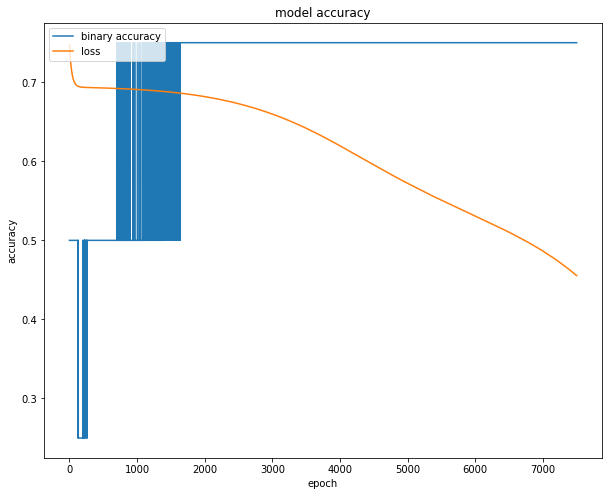

CPU times: user 48.8 s, sys: 5.2 s, total: 54 s
Wall time: 43.7 s


In [0]:
%%time
training = up.ann_train(m, x_train_xor, y_train_xor, 7500)

##Our model has changed

Our model (stored in variable `m`) has a whole new set of weights.

##What's up with the graph?

I am printing it out for you to give you a ballpark on how things are going. The X-axis is number of epochs. The Y-axis is accuracy (on the training set, not the test set). The blue line is the accuracy plot. The orange line represents how bad are your errors (also called loss). You expect the blue line to head to 1.0 (100% accuracy) and the orange line to head to 0.0 (no errors).

In the diagram above you can see I have reached 75% accuracy. But note that the loss line looks to still be on a downward trajectory.

##Think we need to bump epochs

Given that downward-trending loss line, I am going to add on another 1000 epochs.

##Important note!

You do not have to start over with training. We can continue from where we got with 7500. So the model `m` contains the weights we learned from first 7500 epochs. Let's add another 1000 epochs.

##Let's check prediction accuracy before we do that

It is pretty easy. We call the `predict` method on `m` to get outputs for all in the testing set. But in our case we don't really have a testing set so will just pass the training set.

Remember that what we get output values between 0 and 1 from the network. We will have to round to get an actual prediction.

In [0]:
predictions = m.predict(x_train_xor)
list(zip(predictions, y_train_xor))  #you can see we got 1 out of 4 wrong

[(array([0.10629459], dtype=float32), [0]),
 (array([0.63975704], dtype=float32), [1]),
 (array([0.6503835], dtype=float32), [1]),
 (array([0.56247455], dtype=float32), [0])]

Ok, tack on another 1000 epochs and crank er up.

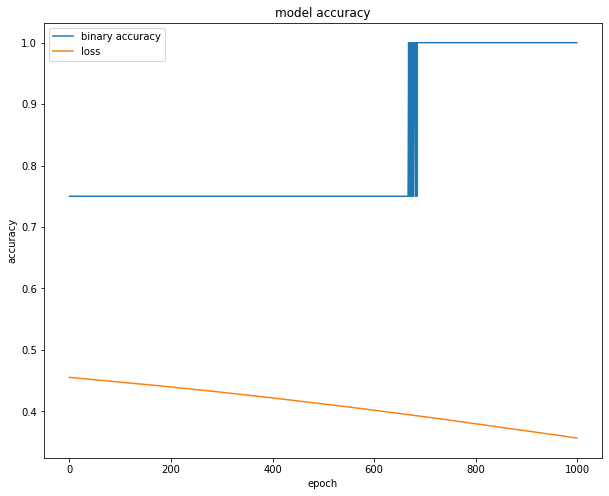

CPU times: user 6.78 s, sys: 685 ms, total: 7.47 s
Wall time: 6.1 s


In [0]:
%%time
training = up.ann_train(m, x_train_xor, y_train_xor, 1000)  #will start with 7500 we already completed - nice

In [0]:
predictions = m.predict(x_train_xor)
list(zip(predictions, y_train_xor))  #all correct

[(array([0.09764561], dtype=float32), [0]),
 (array([0.698401], dtype=float32), [1]),
 (array([0.70325774], dtype=float32), [1]),
 (array([0.45526898], dtype=float32), [0])]

##Nailed it!

Looks like we reached 100% accuracy around 7500+700 epochs.

Just as a reminder of what we have done, we have trained a very simple ANN to compute the xor function, a highly non-linear function. 

Reminder of how non-linear it is:

<img src='https://www.dropbox.com/s/oeud4lstd84l88d/Screenshot%202020-02-21%2013.27.25.png?raw=1' height=200>

Kind of cool if you ask me.

#10. Let's try on `letters_table` from Titanic

We know it will have 27 input values. First thing we need to do is wrangle our data a bit more to get it ready for an ANN. An ANN, like a KNN, expects to use a matrix of vectors as input. So we will need to pull data out of our table and get it set up.




In [0]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSgAgaRjiKp1nPjEDY0-hdHkf4UuepqeBidxQgsgNIqOgFC19z1wVvXfBYR6NvRvCW-uovCvDCcZ7Yx/pub?output=csv'

In [0]:
import pandas as pd

letter_table = pd.read_csv(url,
                          encoding='utf-8')

In [0]:
letter_table.head()


,Survived,Name,Length,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,0,"Braund, Mr. Owen Harris",23,2,1,0,1,1,0,0,1,1,0,0,0,1,2,1,0,0,4,1,0,1,0,1,0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51,2,2,2,1,4,1,3,2,2,1,0,2,2,3,2,0,0,5,3,1,1,0,0,0,2,0
2,1,"Heikkinen, Miss. Laina",22,2,0,0,0,2,0,0,1,4,0,2,1,1,3,0,0,0,0,2,0,0,0,0,0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44,3,0,1,0,6,1,0,2,1,1,0,5,2,0,0,1,1,2,2,2,2,0,0,0,2,0
4,0,"Allen, Mr. William Henry",24,2,0,0,0,2,0,0,1,2,0,0,4,2,2,0,0,0,2,0,0,0,0,1,0,1,0


In [0]:
len(letter_table)

891

##. Wrangle the table

We are going to need a matrix of vectors where each vector is 27 items in length.


In [0]:
bare_table = letter_table.drop(columns=['Name', 'Survived'])

In [0]:
bare_table.head()

,Length,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,23,2,1,0,1,1,0,0,1,1,0,0,0,1,2,1,0,0,4,1,0,1,0,1,0,0,0
1,51,2,2,2,1,4,1,3,2,2,1,0,2,2,3,2,0,0,5,3,1,1,0,0,0,2,0
2,22,2,0,0,0,2,0,0,1,4,0,2,1,1,3,0,0,0,0,2,0,0,0,0,0,0,0
3,44,3,0,1,0,6,1,0,2,1,1,0,5,2,0,0,1,1,2,2,2,2,0,0,0,2,0
4,24,2,0,0,0,2,0,0,1,2,0,0,4,2,2,0,0,0,2,0,0,0,0,1,0,1,0


## Normalize

I probably should have also done this with KNN. It is a good idea to normalize each column. There are different normalization approaches we could take. I'm simply going to normalize between 0 and 1.

In [0]:
bare_table['Length'] = bare_table['Length'] / bare_table['Length'].max()
for column in 'abcdefghijklmnopqrstuvwxyz':
  bare_table[column] = bare_table[column] / bare_table[column].max()


In [0]:
bare_table.head()

,Length,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,0.280488,0.222222,0.333333,0.0,0.25,0.111111,0.00,0.00,0.25,0.166667,0.0,0.0,0.000,0.166667,0.285714,0.142857,0.00,0.0,0.571429,0.142857,0.0,0.2,0.0,0.333333,0.0,0.000000,0.0
1,0.621951,0.222222,0.666667,0.4,0.25,0.444444,0.25,0.75,0.50,0.333333,0.5,0.0,0.250,0.333333,0.428571,0.285714,0.00,0.0,0.714286,0.428571,0.2,0.2,0.0,0.000000,0.0,0.666667,0.0
2,0.268293,0.222222,0.000000,0.0,0.00,0.222222,0.00,0.00,0.25,0.666667,0.0,0.4,0.125,0.166667,0.428571,0.000000,0.00,0.0,0.000000,0.285714,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.536585,0.333333,0.000000,0.2,0.00,0.666667,0.25,0.00,0.50,0.166667,0.5,0.0,0.625,0.333333,0.000000,0.000000,0.25,1.0,0.285714,0.285714,0.4,0.4,0.0,0.000000,0.0,0.666667,0.0
4,0.292683,0.222222,0.000000,0.0,0.00,0.222222,0.00,0.00,0.25,0.333333,0.0,0.0,0.500,0.333333,0.285714,0.000000,0.00,0.0,0.285714,0.000000,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0


## A shortcut for getting our matrix

pandas gives us a method for transforming a table into a lists of lists if we don't care about preserving the column names. Check it out.

In [0]:
letters_matrix = bare_table.values.tolist()

In [0]:
type(letters_matrix)

list

In [0]:
type(letters_matrix[0])

list

Check a few rows.

In [0]:
for i in range(3):
  print(letters_matrix[i])

[0.2804878048780488, 0.2222222222222222, 0.3333333333333333, 0.0, 0.25, 0.1111111111111111, 0.0, 0.0, 0.25, 0.16666666666666666, 0.0, 0.0, 0.0, 0.16666666666666666, 0.2857142857142857, 0.14285714285714285, 0.0, 0.0, 0.5714285714285714, 0.14285714285714285, 0.0, 0.2, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0]
[0.6219512195121951, 0.2222222222222222, 0.6666666666666666, 0.4, 0.25, 0.4444444444444444, 0.25, 0.75, 0.5, 0.3333333333333333, 0.5, 0.0, 0.25, 0.3333333333333333, 0.42857142857142855, 0.2857142857142857, 0.0, 0.0, 0.7142857142857143, 0.42857142857142855, 0.2, 0.2, 0.0, 0.0, 0.0, 0.6666666666666666, 0.0]
[0.2682926829268293, 0.2222222222222222, 0.0, 0.0, 0.0, 0.2222222222222222, 0.0, 0.0, 0.25, 0.6666666666666666, 0.0, 0.4, 0.125, 0.16666666666666666, 0.42857142857142855, 0.0, 0.0, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


I am going to cut you lose on this one. Here is the spec for the network I'd like you to build.

* The input layer will have 27 nodes. Remember this layer is implied.
* Hidden layer 1 has 12 nodes.
* Hidden layer 2 has 6 nodes.
* Hidden layer 3 has 3 nodes.
* Output layer of 1 node.

#Challenge 5
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

Go ahead and build up your model using specs above.

In [0]:
m = up.ann_build_model(27,[12,6,3,1])

You should match my plot.
<pre>
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_8 (Dense)              (None, 12)                336       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
=================================================================
Total params: 439
Trainable params: 439
Non-trainable params: 0
_________________________________________________________________
</pre>

In [0]:
m.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                336       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 4         
Total params: 439
Trainable params: 439
Non-trainable params: 0
_________________________________________________________________


##Do training

Normally we would bring in our holdout approach here. But tell you what, I'll let you test with the training set given we are just getting our feet wet for now.

In [0]:
x_train = letters_matrix
y_train = letter_table['Survived'].tolist()

I'll start at 100. Looks like 1.5 minutes per 100 epochs. I got an accuracy of `0.6689113355780022`. Here is my plot.

<img src='https://www.dropbox.com/s/fahf9q1or4p6lkc/Screenshot%202020-05-15%2013.01.30.png?raw=1' height=200>

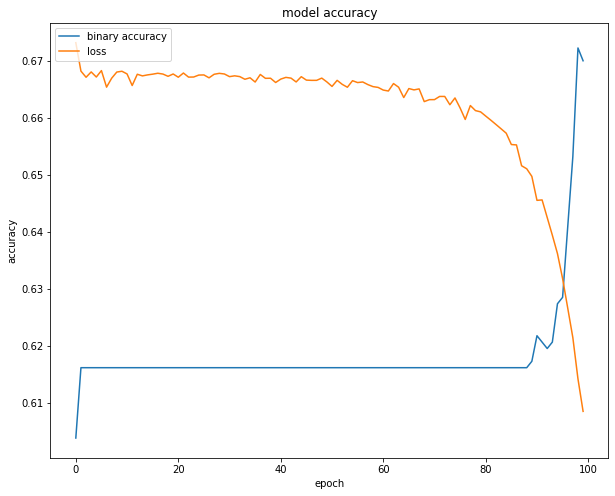

CPU times: user 1min 57s, sys: 9.51 s, total: 2min 7s
Wall time: 1min 38s


In [0]:
%%time
training = up.ann_train(m, x_train, y_train, 100)

I can ask to see the accuracy for the last 10 epochs. Gives me a rough idea on if I am still improving.

In [0]:
training.history['binary_accuracy'][-10:]  # ...  0.6700336933135986]]

[0.6217733025550842,
 0.6206509470939636,
 0.619528591632843,
 0.6206509470939636,
 0.6273849606513977,
 0.6285073161125183,
 0.6408529877662659,
 0.6531986594200134,
 0.6722783446311951,
 0.6700336933135986]

In [0]:
predictions = m.predict(x_train)  #Go ahead and predict using training data, generally a no no
zipped = list(zip(predictions, y_train))
zipped[:10]

[(array([0.32112178], dtype=float32), 0),
 (array([0.4928032], dtype=float32), 1),
 (array([0.4327245], dtype=float32), 1),
 (array([0.48703325], dtype=float32), 1),
 (array([0.38414127], dtype=float32), 0),
 (array([0.24810994], dtype=float32), 0),
 (array([0.32448748], dtype=float32), 0),
 (array([0.3956098], dtype=float32), 0),
 (array([0.52680266], dtype=float32), 1),
 (array([0.47931868], dtype=float32), 1)]

I'll go ahead and actually get percentage I got right.

In [0]:
correct_count = 0
for i in range(len(predictions)):
  p, a = zipped[i]
  if round(p[0]) == a:
    correct_count += 1
correct_count/len(predictions)


0.6689113355780022

I'd like to push a little further to make sure we have really stalled on improving. Go and ahead and try another 300 epochs (giving you 400 total).

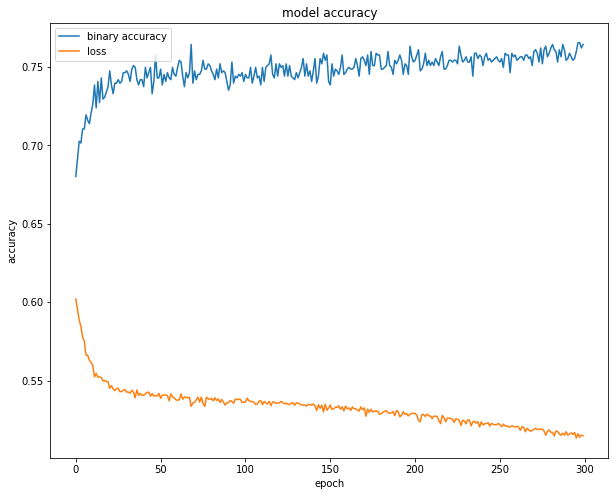

CPU times: user 5min 53s, sys: 29.3 s, total: 6min 22s
Wall time: 4min 56s


In [0]:
%%time
training = up.ann_train(m, x_train, y_train, 300)

In [0]:
training.history['binary_accuracy'][-10:]  # ...  0.7643097639083862]]

[0.7553310990333557,
 0.7586981058120728,
 0.7564533948898315,
 0.7542087435722351,
 0.7553310990333557,
 0.7598204016685486,
 0.7654321193695068,
 0.7654321193695068,
 0.7620651125907898,
 0.7643097639083862]

##Discussion

A question that is sure to come up for you when using an ANN is where should I stop? Is adding more epochs helping? Or perhaps it is hurting? Yes, you can over-train and lose accuracy.

I think the results we are getting point to we have reached a point where we can expect little better. Here are clues that I see. First, the plot.

<img src='https://www.dropbox.com/s/jm9pzoo2avbuapm/Screenshot%202020-05-15%2013.05.40.png?raw=1' height=200>

Our accuracy (blue line) is now bouncing back and forth, all around .75. This is typically a sign that we have found the basic accuracy. We might bounce around it but not a big benefit in extending epochs.

Second, the accuracy from last 10 epochs shows the same bouncing around behavior.

The maddening thing is that I can't say these are perfect indicators. It could be that we are at a plateau but have not reached the true peak. You could try more epochs. I would probably be tempted to do a sanity check by running the same data on something like KNN. In fact we did do that in early weeks and ended up with an accuracy of around 62%. But that was with holdout and a true testing set. I would predict we would get roughly the same with your ANN if we did the same: created a test set and predicted on it.

##What if I decide I have enough epochs?

Well then, you still have other hyperparameters to play with to try to improve your score. In particular, number of layers and number of nodes per layer. It gets to be a big (and hard to manage) search for the right settings for lots of different parameters. I'll talk a bit more about choosing layers and nodes in following chapters.

##Go ahead and get predictions

In [0]:
predictions = m.predict(x_train)
zipped = list(zip(predictions, y_train))

In [0]:
correct_count = 0
for i in range(len(predictions)):
  p, a = zipped[i]
  if round(p[0]) == a:
    correct_count += 1
correct_count/len(predictions)


0.7463524130190797

#11. ANN better than KNN?

We got an accuracy of 62% on the same problem with KNN. But that was using the holdout method. I expect our score of 75% will drop to that if we took the time to do holdout here.

So we are back to, what the heck do you expect? Using Numerology to do survival prediction? Crazy. We will look at a new dataset where we have a better chance next chapter.

But let's say that KNN is in fact slightly better than what we can get with our best efforts using KNN. Think about the tradeoffs. With KNN you have almost zero training costs. Just set up the crowd-matrix. With an ANN, you can have a substantial training cost, searching the space of epochs, layers/nodes, and many more that we skipped over.

But all that is reversed once you get to prediction. A KNN can be prohibitively expensive to get a prediction. If you want a prediction in real time, forget it. For an ANN, prediction is basically zero. The feedforward cost is a bunch of dot-products that are superfast on modern computers.

